# Exploratory Data Analysis (EDA)

The thesis "Hyperbolic Object Detection Towards an Open World" makes use of open source image datesets to conduct the research on. Two datasets are used for this purpose, the PASCAL VOC 2012 dataset and the MS COCO dataset. First the PASCAL VOC2012 dataset is imported and processed. Secondly the MS COCO data is processed. However, due to the size of the MS COCO dataset, this dataset is not imported but only the required values are used. 


##### PASCAL VOC 2012
The first dataset is the PASCAL Visual Object Classes (VOC) 2012 dataset. The PASCAL VOC dataset is a multi-object detection dataset for computer vision tasks in object recognition and detection. It contains over 20.000 annotated images from 20 object classes, including cars, bicycles, and pedestrians. 

The source of the dataset: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#devkit

##### MS COCO 2017
The second dataset is the Microsoft Common Objects in Context (MS COCO) dataset. The MS COCO dataset is a large-scale image recognition dataset. It is commonly used for training and evaluating computer vision models in tasks such as object detection, instance segmentation, and caption generation.

The source of the dataset: https://cocodataset.org/#home
Github link: https://github.com/JesseK2000/master_thesis

## PASCAL VOC 2012 EDA

In this section the EDA of the PASCAL VOC 2012 dataset is depicted. The most important features are shown. 

### Preparations PASCAL VOC 2012

First the following imports that are necesarry for the EDA are imported.  

In [1]:
import os
import numpy as np
import pandas as pd
import requests
import json
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import tarfile
from PIL import Image, ImageDraw

Then the paths to the images and annotations are defined. Additionally the annotation files are listed.

In [2]:
data = './VOCdevkit/VOC2012'
annotations = os.path.join(data, 'Annotations')
images = os.path.join(data, 'JPEGImages')

anno_files = os.listdir(annotations)

The following cell shows some basic information about the dataset that is relevant for the understanding of the data. It shows the number of images, the number of classes, the number of objects, the average number of objects per image and the amount of class occurences in the dataset.

In [3]:
# Define necessary variables
num_objects = []
classes = set()
class_info = {}

# Loop over all annotation files
for anno_file in anno_files:
    tree = ET.parse(os.path.join(annotations, anno_file))
    root = tree.getroot()
    objects = root.findall('object')
    num_objects.append(len(objects))
    for obj in objects:
        name = obj.find('name').text
        classes.add(name)

# Print all class information
for c in classes:
    class_info[c] = sum([1 for f in anno_files if c in open(os.path.join(annotations, f)).read()])
class_info = pd.Series(class_info)

# Print descriptives of the dataset
print("Descriptives of the PASCAL VOC 2012 dataset.")
print("Number of images: ", len(anno_files))
print("Number of classes: ", len(classes))
print("Number of objects: ", sum(num_objects))
print("Average number of objects per image: ", sum(num_objects) / len(anno_files))

print("\n Number of objects per class.")
display(class_info)

Descriptives of the PASCAL VOC 2012 dataset.
Number of images:  17125
Number of classes:  20
Number of objects:  40138
Average number of objects per image:  2.3438248175182483

 Number of objects per class.


cow              340
chair           1366
tvmonitor        645
horse           5114
bus              467
person          9583
car             1284
bottle           812
motorbike        575
bicycle          603
sheep            357
diningtable      691
pottedplant      613
bird             811
boat             549
aeroplane        716
train            589
cat            12537
dog             1341
sofa             742
dtype: int64

The next cell plots three images with the corresponding bounding boxes around the objects. It also shows some general information about those images.

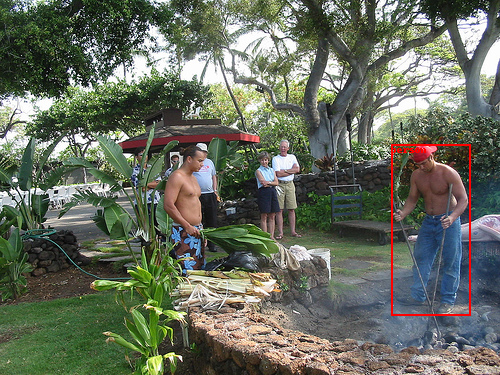

Image: 2011_006135.jpg
Object: person   Coordinates: 391 144 470 315
--------------------------------------------------


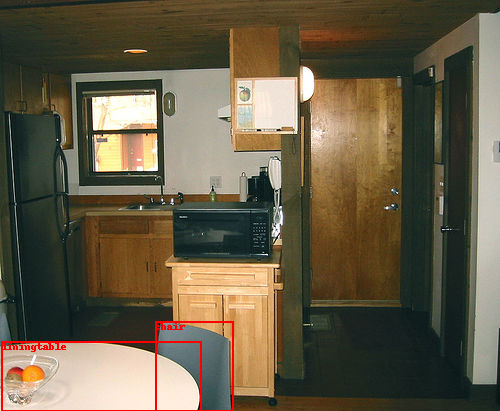

Image: 2008_006482.jpg
Object: chair   Coordinates: 1 341 201 411
Object: diningtable   Coordinates: 1 341 201 411
--------------------------------------------------


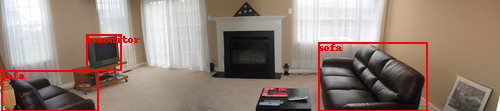

Image: 2010_005054.jpg
Object: tvmonitor   Coordinates: 1 70 98 111
Object: sofa   Coordinates: 1 70 98 111
Object: sofa   Coordinates: 1 70 98 111
--------------------------------------------------


In [4]:
# Create a list of all images with bounding boxes
bbox_images = []
for file in anno_files:
    tree = ET.parse(os.path.join(annotations, file))
    root = tree.getroot()
    for obj in root.findall('object'):
        cls = obj.find('name').text
        filename = os.path.splitext(file)[0]
        if filename not in bbox_images:
            bbox_images.append(filename)

# Loop through the list of images with bounding boxes and display them
for filename in bbox_images[:3]:
    img_path = os.path.join(images, filename + '.jpg')
    img = Image.open(img_path).convert('RGB')
    draw = ImageDraw.Draw(img)
    anno_path = os.path.join(annotations, filename + '.xml')
    tree = ET.parse(anno_path)
    root = tree.getroot()

    # Loop through all the object elements in the file
    for obj in root.findall('object'):
        cls = obj.find('name').text

        # Get the bounding box coordinates
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        # Draw the bounding box and label on the image
        draw.rectangle((xmin, ymin, xmax, ymax), outline='red', width=2)
        draw.text((xmin, ymin), cls, fill='red')

    # Display the image and annotations in the notebook
    display(img)
    print('Image:', filename + '.jpg')
    for obj in root.findall('object'):
        cls = obj.find('name').text
        bbox = obj.find('bndbox')
        print('Object:', cls, '  Coordinates:', xmin, ymin, xmax, ymax)
    print('-' * 50)


Below, some descriptive plots are shown. There are four plots with the distribution of image heights, the distribution of image widths, the distribution of the number of objects per image and the number of occurences of the classes in the dataset.

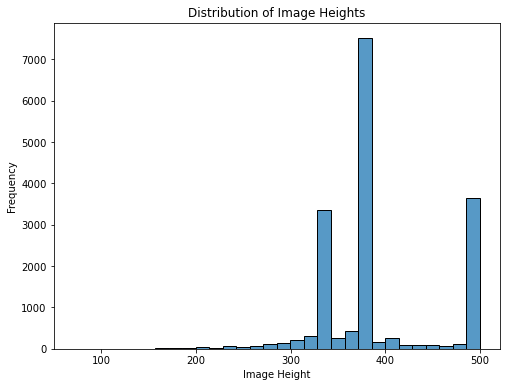

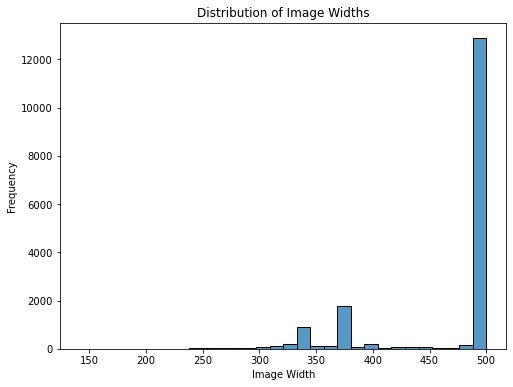

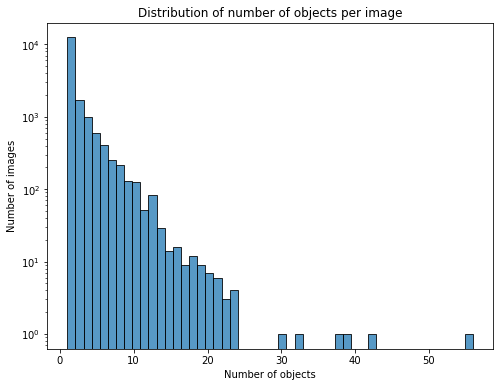

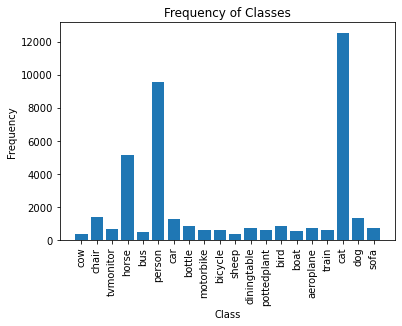

In [8]:
# Get the image sizes
image_list = os.listdir(images)
image_sizes = []
for img_file in image_list:
    img_path = os.path.join(images, img_file)
    img = plt.imread(img_path)
    image_sizes.append(img.shape)
image_sizes = np.array(image_sizes)

# Plot the distribution of image sizes
plt.figure(figsize=(8,6))
sns.histplot(image_sizes[:,0], kde=False, bins=30)
plt.xlabel('Image Height')
plt.ylabel('Frequency')
plt.title('Distribution of Image Heights')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(image_sizes[:,1], kde=False, bins=30)
plt.xlabel('Image Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')
plt.show()

# Plot a histogram of the number of objects per image
plt.figure(figsize=(8,6))
sns.histplot(num_objects, kde=False, bins=50)
plt.yscale('log')
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Distribution of number of objects per image')
# plt.savefig("NumObj.png")
plt.show()

plt.bar(class_info.index, class_info.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Classes')
plt.xticks(rotation=90)
plt.show()

Looking at the third plot of the above cell, something interesting can be seen. Most images have a low number of objects. However there are some images with a high amount of objects in the image. The next cell searches for the image with the most objects, which is in this case 56 objects. The cell shows this image with the corresponding objects indicated by red bounding boxes with their corresponding label.

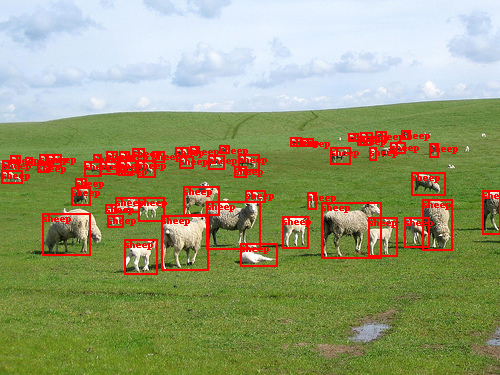

Path to image: ./VOCdevkit/VOC2012/JPEGImages/2008_007069.jpg
Number of objects in image: 56


In [6]:
max_index = num_objects.index(max(num_objects))
max_anno_file = anno_files[max_index]
max_filename = os.path.splitext(max_anno_file)[0]
max_img_path = os.path.join(images, max_filename + '.jpg')
max_img = Image.open(max_img_path).convert('RGB')
max_draw = ImageDraw.Draw(max_img)
max_anno_path = os.path.join(annotations, max_filename + '.xml')
max_tree = ET.parse(max_anno_path)
max_root = max_tree.getroot()

for obj in max_root.findall('object'):
    cls = obj.find('name').text
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    max_draw.rectangle((xmin, ymin, xmax, ymax), outline='red', width=2)
    max_draw.text((xmin, ymin), cls, fill='red')

display(max_img)

print("Path to image:", max_img_path)
max_index = num_objects.index(max(num_objects))
print("Number of objects in image:", max(num_objects))

## MS COCO 2017 EDA

In this section the EDA of the MS COCO dataset is depicted. The most important features are shown. The MS COCO EDA is executed by using the annotations of the dataset. Because of the size of this dataset, only the annotations are used to obtain the most important information about the MS COCO 2017 dataset. This should not be a problem, just the number of images depicted below (118287) is not the same as the total amount of images in the whole dataset (328.000). This is because the annotations alone don't contain all 328.000 images. The annotations only contain information about the objects in the images, such as their location and class, which is sufficient for the EDA. Once downloaded the images, the file names in the annotations can be used to locate and load the images. Important to notice in this part of the EDA, even if the images are not downloaded, the image urls in the annotations can still show images of the dataset.

### Preparations MS COCO 2017

There are no new imports needed so the same imports as the PASCAL VOC 2012 EDA is used. Hence this, the imports are not shown here. First the annotation data is loaded and it structure is retrieved. As can be seen there are five instances the annotation data consists of. The instances used in this EDA are the images, annotations and categories. 

In [6]:
# Load the annotations data
with open('COCO/annotations/instances_train2017.json', 'r') as f:
    root = json.load(f)

root.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

Below the three instances used are shown. The first row of each instance is depicted. This data gives more insight into the images of the MS COCO dataset.

In [7]:
print(root['annotations'][0])
print('-' * 50)
print(root['images'][0])
print('-' * 50)
print(root['categories'][0])

{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}
--------------------------------------------------
{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
--------------------------------------------------
{'supercategory': 'person', 'id': 1, 'name': 'person'}


In the next cell, an image is plotted with the corresponding bounding boxes.

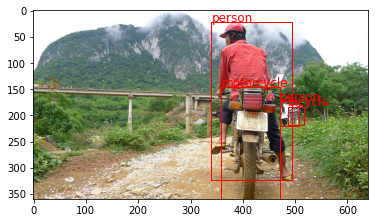

In [8]:
# URL of the image
image_url = root['images'][0]['coco_url']

# Load the image from the coco_url
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Plot image
plt.imshow(img)

# Get the annotations for the image
image_id = root['images'][0]['id']
annotations = []
for annotation in root['annotations']:
    if annotation['image_id'] == image_id:
        category_id = annotation['category_id']
        category_name = root['categories'][category_id - 1]['name']
        bbox = annotation['bbox']
        annotations.append({'name': category_name, 'bbox': bbox})

# Plot the bounding boxes on top of the image
for annotation in annotations:
    bbox = annotation['bbox']
    x, y, w, h = bbox
    rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red')
    plt.gca().add_patch(rect)
    plt.text(x, y-2, annotation['name'], color='red', fontsize=12)
    
# Display plot
plt.show()

The following cell shows some basic information about the dataset that is relevant for the understanding of the data. It shows the number of images, the number of classes, the number of objects, the average number of objects per image, some size properties and the amount of class occurences in the dataset.

In [9]:
# Get all the heights and widths of the images
heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]

# Extract the list of classes and their counts from the annotations
class_counts = {}
for annotation in root['annotations']:
    category_id = annotation['category_id']
    if category_id < 1 or category_id > len(root['categories']):
        continue
    category_name = root['categories'][category_id - 1]['name']
    if category_name in class_counts:
        class_counts[category_name] += 1
    else:
        class_counts[category_name] = 1

num_objects = 0
for annotation in root['annotations']:
    num_objects += len(annotation['bbox'])
        
# Count the number of images and classes in the dataset
num_images = len(root['images'])
num_classes = len(root['categories'])
avg_objects_per_image = num_objects / num_images

# Print out the basic information about the dataset
print(f"Number of images (subset): {num_images}")
print(f"Number of classes: {num_classes}") 
print(f"Number of objects: {num_objects}")
print(f"Average number of objects per image: {avg_objects_per_image:.2f}")
print('Max min avg height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max min avg width: ', max(widths), min(widths), int(sum(widths)/len(widths)))

# Convert the class counts to a Pandas Series
class_counts_series = pd.Series(class_counts)
print("\n Number of objects per class.")
print(class_counts_series)

Number of images (subset): 118287
Number of classes: 80
Number of objects: 3440004
Average number of objects per image: 29.08
Max min avg height:  640 51 484
Max min avg width:  640 59 577

 Number of objects per class.
couch           2918
horse           5508
laptop          8652
sink            5805
cat            10806
               ...  
handbag         8720
skis           12354
sports ball     6192
giraffe         5303
zebra           1294
Length: 71, dtype: int64


The plot below shows the frequency of the classes in the MS COCO 2017 dataset.

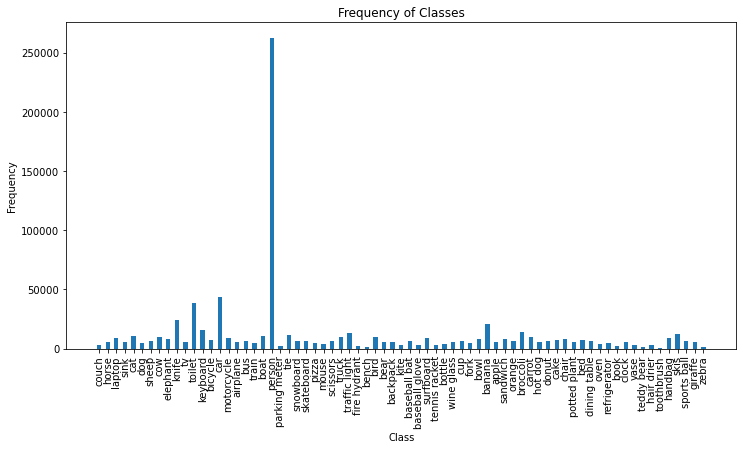

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(class_counts_series.index, class_counts_series.values, width=0.5)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Classes')
plt.xticks(rotation=90)
plt.show()